<h2>Koneksi ke Google Drive</h2>

In [96]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h2>EDA</H2>

In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.api import ExponentialSmoothing

In [98]:
dataset = pd.read_csv("/content/gdrive/MyDrive/NarasioData/Senior Data Scientist/Meet 5/Time Series/Time_Series.csv")
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2/12/2010,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2/19/2010,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2/26/2010,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,3/5/2010,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48789 entries, 0 to 48788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         48789 non-null  int64  
 1   Dept          48789 non-null  int64  
 2   Date          48789 non-null  object 
 3   Weekly_Sales  48789 non-null  float64
 4   IsHoliday     48789 non-null  bool   
 5   Temperature   48789 non-null  float64
 6   Fuel_Price    48789 non-null  float64
 7   CPI           48789 non-null  float64
 8   Unemployment  48789 non-null  float64
 9   Type          48789 non-null  object 
 10  Size          48789 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 3.8+ MB


<h3>Visualisasi Data Variabel Type Terhadap Weekly Sales</h3>

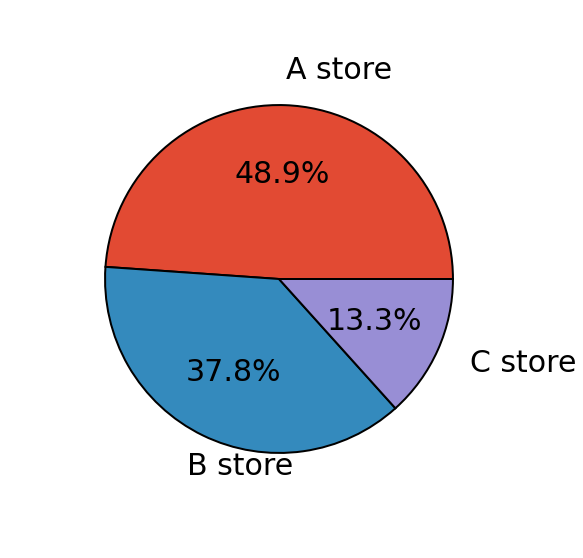

In [100]:
sorted_type = dataset.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
fig, axes = plt.subplots(1,1, figsize=(10,10))
wprops={'edgecolor':'black',
      'linewidth':2}
tprops = {'fontsize':30}
axes.pie(sizes,
        labels=labels,
        explode=(0.0,0,0),
        autopct='%1.1f%%',
        pctdistance=0.6,
        labeldistance=1.2,
        wedgeprops=wprops,
        textprops=tprops,
        radius=0.8,
        center=(0.5,0.5))
plt.show()

<h3>Visualisasi Data Variabel IsHoliday Terhadap Weekly Sales</h3>

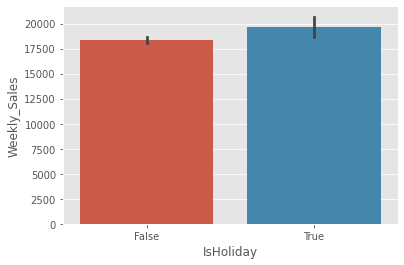

In [101]:
holiday = dataset['Weekly_Sales'].loc[dataset['IsHoliday']== True]
non_holiday = dataset['Weekly_Sales'].loc[dataset['IsHoliday']== False]
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=dataset)

<h3>Visualisasi Data Variabel Size Terhadap Weekly Sales</h3>

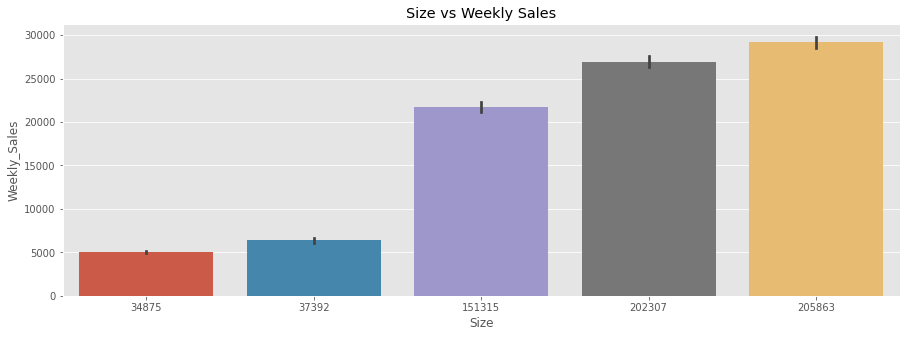

In [102]:
fig = plt.figure(figsize =(15,5))
sns.barplot(x='Size', y='Weekly_Sales', data=dataset)
plt.title('Size vs Weekly Sales')
plt.show()

In [103]:
dataset.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000,48789.000000
mean,2.949661,43.244686,18454.807993,67.676185,3.218941,198.278297,6.944106,130923.546271
std,1.412636,29.687920,28180.273787,14.940451,0.423397,36.182937,1.037750,75238.683799
min,1.000000,1.000000,-1098.000000,28.840000,2.514000,126.064000,3.879000,34875.000000
25%,2.000000,19.000000,2185.530000,56.550000,2.759000,210.896761,6.489000,37392.000000
50%,3.000000,36.000000,7337.930000,69.360000,3.290000,214.702765,7.143000,151315.000000
75%,4.000000,71.000000,21211.180000,80.910000,3.594000,219.811885,7.787000,202307.000000
max,5.000000,99.000000,385051.040000,93.340000,3.907000,226.987364,8.623000,205863.000000


<p>Karena Weekly_Sales terdapat data negatif, maka kita akan memfilter hanya apabila Weekly_Sales >= </p>

In [104]:
dataset = dataset[dataset['Weekly_Sales'] >= 0]
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2/12/2010,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2/19/2010,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2/26/2010,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,3/5/2010,21827.90,False,46.50,2.625,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
48784,5,98,7/6/2012,94.50,False,82.35,3.227,222.471434,5.603,B,34875
48785,5,98,7/13/2012,27.00,False,80.78,3.256,222.512148,5.603,B,34875
48786,5,98,7/20/2012,8.00,False,81.05,3.311,222.520936,5.603,B,34875
48787,5,98,8/3/2012,10.00,False,86.91,3.417,222.538511,5.603,B,34875


<h3>Visualisasi Matriks Korelasi</h3>

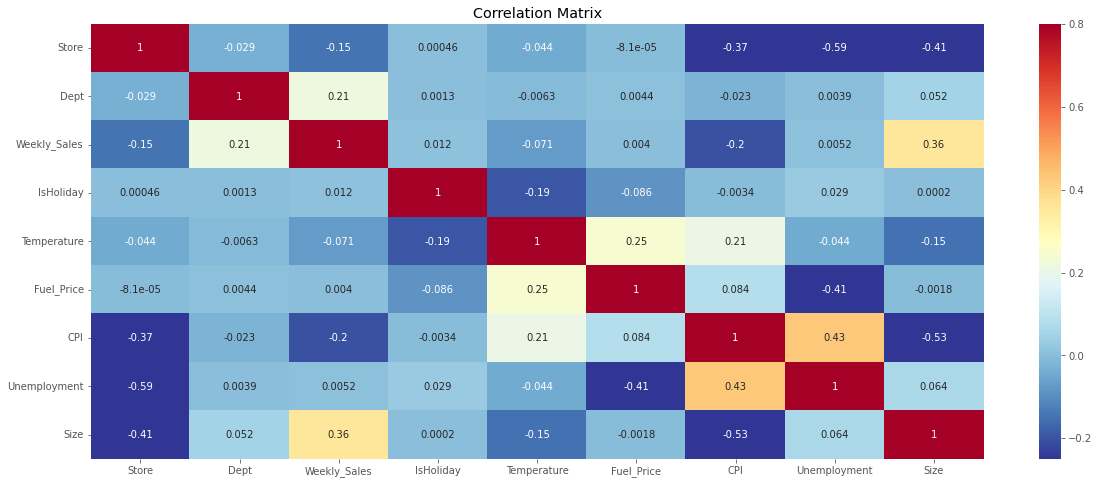

In [105]:
corrs = dataset.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.8)
plt.title('Correlation Matrix');

In [106]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset.index = dataset["Date"]
dataset = dataset.drop('Date', axis=1)
dataset = dataset.resample('MS').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<p>Setelah dilakukan visualisasi terhadap Weekly_Sales, saya asumsikan bahwa data ini memiliki pola stasioner</p>

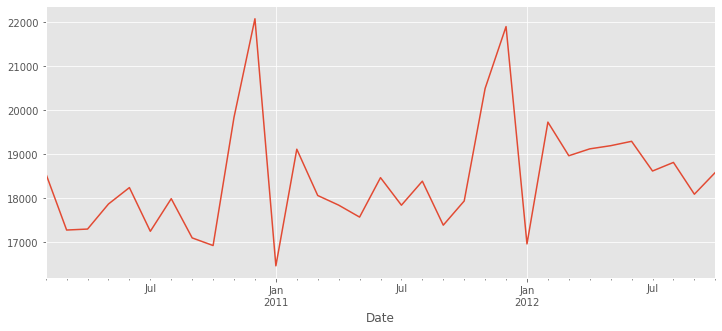

In [107]:
dataset['Weekly_Sales'].plot(figsize=(12,5))

<h2>Data Preprocessing</h2>

<h3>Melakukan Splitting Data</h3>

In [108]:
train_data = dataset[:int(0.7*(len(dataset)))]
test_data = dataset[int(0.7*(len(dataset))):]

print('Train data:\n')
print(train_data.tail())
print('='*50,'\n')
print('Test data:\n')
print(test_data.head())
print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train data:

               Store       Dept  ...  Unemployment           Size
Date                             ...                             
2011-08-01  2.938336  43.473997  ...      7.116855  131523.707281
2011-09-01  2.941696  43.212014  ...      7.115447  131471.267373
2011-10-01  2.957028  43.529497  ...      6.791734  130059.525856
2011-11-01  2.950760  43.422882  ...      6.792594  130534.987690
2011-12-01  2.962836  43.942253  ...      6.790674  129724.217267

[5 rows x 9 columns]

Test data:

               Store       Dept  ...  Unemployment           Size
Date                             ...                             
2012-01-01  2.953285  43.285401  ...      6.356107  130548.527007
2012-02-01  2.955829  43.824765  ...      6.356514  130405.705286
2012-03-01  2.960750  43.166960  ...      6.352045  130371.875806
2012-04-01  2.950988  43.141185  ...      6.157960  130793.951719
2012-05-01  2.952698  43.464154  ...      6.154645  130901.326681

[5 rows x 9 columns]
Train:

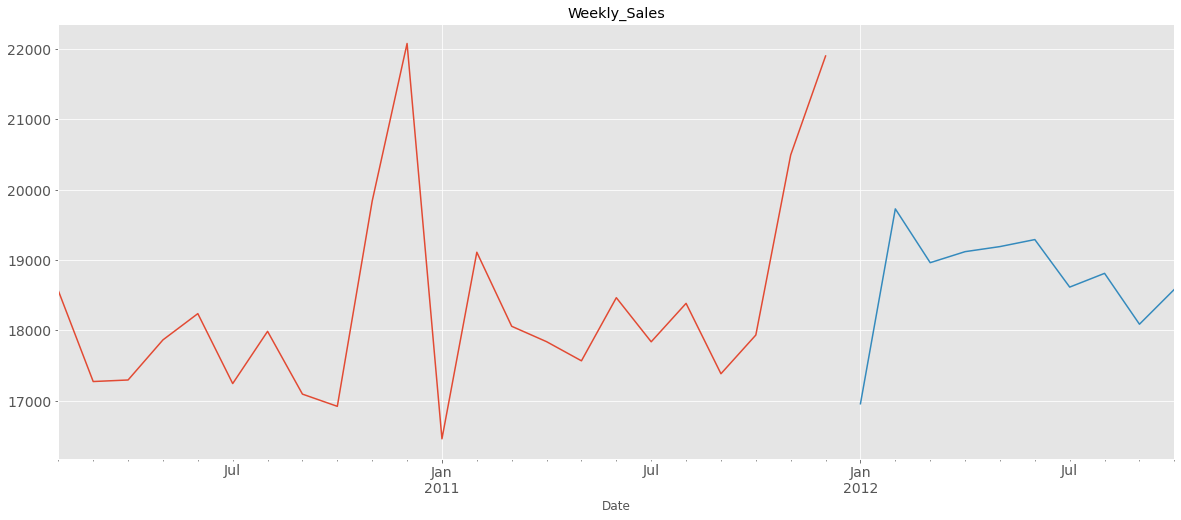

In [109]:
train_data = train_data['Weekly_Sales']
test_data = test_data['Weekly_Sales']

train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

<p>
H0 : Data time series tidak stasioner <br>
H1 : data time series stasioner

Karena nilai p < 0.05, maka kita dapat menolak H0 dan dapat disimpulkan bahwa data ini memanglah stasioner.
</p>

In [110]:
#fungsi untuk melihat apakah data stasioner atau tidak
def cek_stationary(sales):
    result = adfuller(sales)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags-used: {}'.format(result[2]))
    print('number of Observations: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

cek_stationary(train_data)

ADF Statistic: -3.129382920325669
p-value: 0.02445376492060848
lags-used: 0
number of Observations: 22
Critical Values:
	1%: -3.769732625845229
	5%: -3.005425537190083
	10%: -2.6425009917355373


<h2>Modelling</h2>

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


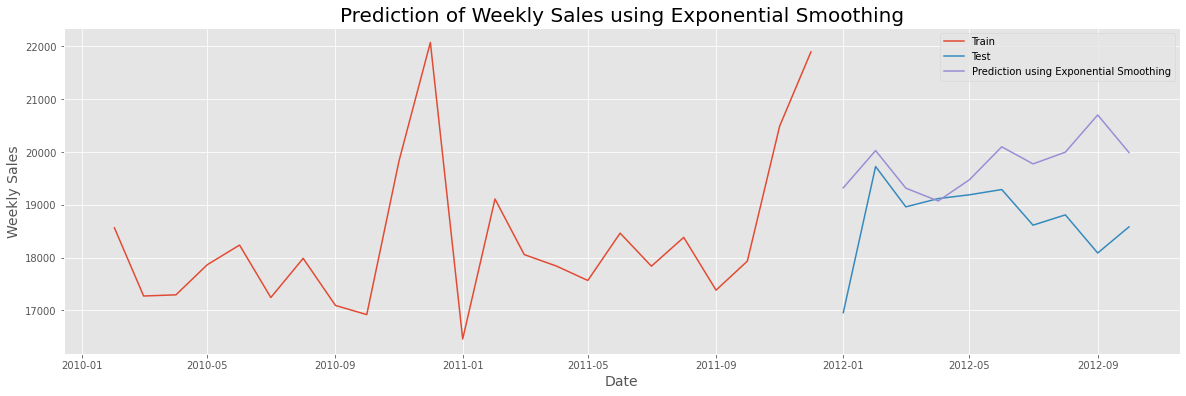

In [111]:
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=7, trend='additive', seasonal='additive').fit() 
pred = model_holt_winters.forecast(len(test_data))

plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Exponential Smoothing', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Prediction using Exponential Smoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

<p>
Interpretasi MAPE
<ul>
<li>< 10 %	: Very good</li>
<li>10 % - 20 %	: Good</li>
<li>20 % - 50 %	: OK</li>
<li>> 50 %	: Not good</li>
</ul>
Pada kasus ini, didapati bahwa nilai MAPE 5,78%. Oleh karena itu, dapat disimpulkan bahwa model ini sangat bagus.
</p>

In [112]:
#fungsi untuk melakukan perhitungan MAPE
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print('Mean Absolute Percentage Error (MAPE): ', mape(test_data, pred))

Mean Absolute Percentage Error (MAPE):  5.785741634188655


<h2>Kesimpulan</h2>


*   Terdapat peningkatan penjualan pada beberapa minggu ke depan hingga pada bulan Februari berada pada puncaknya bertepatan dengan hari Super Bowl pada tanggal 10 Februari. Setelah itu, transaksi penjualan berangsur-angsur turun. Namun, pada sekitar akhir tahun menjelang tiga hari raya besar, yaitu Labor Day (September), Thanksgiving (November), dan Natal (Desember) ada peningkatan kembali karena hari libur untuk merayakan hari-hari besar tersebut. Diharapkan agar acara penurunan harga promosi dilakukan terutama menjelang akhir tahun sekitar bulan september karena akan sangat berdampak pada peningkatan hasil penjualan setiap minggunya.
*   Prediksi model tersebut akurat jika hanya memprediksi beberapa waktu dekat saja dalam kasus ini sekitar tiga bulan kedepan

